In [1]:
from sklearn.tree import DecisionTreeClassifier

import os
import pandas as pd
import numpy as np

# Define the path to the XML files
path = r"C:\Users\Des\Downloads\ISCXIDS2012 dataset\labeled_flows_xml"

# Initialize lists to store data
X_Normal = []
Y_Normal = []
X_Attack = []
Y_Attack = []

# Iterate through all files in the specified path
for file in os.listdir(path):

    # Read into pandas
    df = pd.read_xml(path + '\\' + file)
    print(df.info())  # Optional

    # Analyze the appName column
    app_count = pd.value_counts(df['appName'])
    
    # Count occurrences in the 'Tag' column
    attack_count = pd.value_counts(df['Tag'])

    # Separate Attack and Normal rows
    attack_dataframe = df.loc[df['Tag'] == 'Attack']

    # Count appName occurrences in the Attack DataFrame
    attack_count2 = pd.value_counts(attack_dataframe['appName'])

    normal_dataframe = df.loc[df['Tag'] == 'Normal']

    # Separate features (X) and labels (Y) for Attack and Normal data
    normal_dataframe_Y = normal_dataframe[['Tag']]
    attack_dataframe_Y = attack_dataframe[['Tag']]

    # Select feature columns
    attack_dataframe = attack_dataframe[['totalSourceBytes', 'totalDestinationBytes', 
                                        'totalDestinationPackets', 'totalSourcePackets', 'sourcePort', 'destinationPort']]
    normal_dataframe = normal_dataframe[['totalSourceBytes', 'totalDestinationBytes', 
                                        'totalDestinationPackets', 'totalSourcePackets', 'sourcePort', 'destinationPort']]

    # Append data to the lists
    X_Normal.append(normal_dataframe)
    Y_Normal.append(normal_dataframe_Y)
    X_Attack.append(attack_dataframe)
    Y_Attack.append(attack_dataframe_Y)

# Concatenate all collected data into single DataFrames
X_Normal = pd.concat(X_Normal, ignore_index=True)
Y_Normal = pd.concat(Y_Normal, ignore_index=True)
X_Attack = pd.concat(X_Attack, ignore_index=True)
Y_Attack = pd.concat(Y_Attack, ignore_index=True)

from sklearn.model_selection import train_test_split

X_train_N, X_test_N, Y_train_N, Y_test_N = train_test_split(X_Normal, Y_Normal, test_size=0.3, random_state=0)
X_train_A, X_test_A, Y_train_A, Y_test_A = train_test_split(X_Attack, Y_Attack, test_size=0.3, random_state=0)

X_train = pd.concat([X_train_N, X_train_A])
X_train = X_train.sample(frac=1, random_state=42)

X_test = pd.concat([X_test_N, X_test_A])
X_test = X_test.sample(frac=1, random_state=42)

Y_train = np.concatenate([Y_train_N, Y_train_A])
Y_train = pd.DataFrame(Y_train)
Y_train = Y_train.sample(frac=1, random_state=42)

Y_test = np.concatenate([Y_test_N, Y_test_A])
Y_test = pd.DataFrame(Y_test)
Y_test = Y_test.sample(frac=1, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         171380 non-null  object
 1   totalSourceBytes                171380 non-null  int64 
 2   totalDestinationBytes           171380 non-null  int64 
 3   totalDestinationPackets         171380 non-null  int64 
 4   totalSourcePackets              171380 non-null  int64 
 5   sourcePayloadAsBase64           84579 non-null   object
 6   destinationPayloadAsBase64      74634 non-null   object
 7   destinationPayloadAsUTF         74616 non-null   object
 8   direction                       171380 non-null  object
 9   sourceTCPFlagsDescription       122074 non-null  object
 10  destinationTCPFlagsDescription  117397 non-null  object
 11  source                          171380 non-null  object
 12  protocolName                  

C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:27: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count = pd.value_counts(df['Tag'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:33: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count2 = pd.value_counts(attack_dataframe['appName'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133193 entries, 0 to 133192
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         133193 non-null  object
 1   totalSourceBytes                133193 non-null  int64 
 2   totalDestinationBytes           133193 non-null  int64 
 3   totalDestinationPackets         133193 non-null  int64 
 4   totalSourcePackets              133193 non-null  int64 
 5   sourcePayloadAsBase64           70040 non-null   object
 6   sourcePayloadAsUTF              70040 non-null   object
 7   destinationPayloadAsBase64      68042 non-null   object
 8   destinationPayloadAsUTF         68041 non-null   object
 9   direction                       133193 non-null  object
 10  sourceTCPFlagsDescription       94981 non-null   object
 11  destinationTCPFlagsDescription  90822 non-null   object
 12  source                        

C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:27: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count = pd.value_counts(df['Tag'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:33: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count2 = pd.value_counts(attack_dataframe['appName'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275528 entries, 0 to 275527
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         275528 non-null  object
 1   totalSourceBytes                275528 non-null  int64 
 2   totalDestinationBytes           275528 non-null  int64 
 3   totalDestinationPackets         275528 non-null  int64 
 4   totalSourcePackets              275528 non-null  int64 
 5   sourcePayloadAsBase64           123604 non-null  object
 6   sourcePayloadAsUTF              123388 non-null  object
 7   destinationPayloadAsBase64      118724 non-null  object
 8   destinationPayloadAsUTF         118696 non-null  object
 9   direction                       275528 non-null  object
 10  sourceTCPFlagsDescription       220704 non-null  object
 11  destinationTCPFlagsDescription  213038 non-null  object
 12  source                        

C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:27: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count = pd.value_counts(df['Tag'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:33: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count2 = pd.value_counts(attack_dataframe['appName'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149625 entries, 0 to 149624
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         149625 non-null  object
 1   totalSourceBytes                149625 non-null  int64 
 2   totalDestinationBytes           149625 non-null  int64 
 3   totalDestinationPackets         149625 non-null  int64 
 4   totalSourcePackets              149625 non-null  int64 
 5   sourcePayloadAsBase64           68735 non-null   object
 6   sourcePayloadAsUTF              68735 non-null   object
 7   destinationPayloadAsBase64      65443 non-null   object
 8   destinationPayloadAsUTF         65443 non-null   object
 9   direction                       149625 non-null  object
 10  sourceTCPFlagsDescription       121470 non-null  object
 11  destinationTCPFlagsDescription  111182 non-null  object
 12  source                        

C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:27: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count = pd.value_counts(df['Tag'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:33: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count2 = pd.value_counts(attack_dataframe['appName'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61832 entries, 0 to 61831
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   appName                         61832 non-null  object
 1   totalSourceBytes                61832 non-null  int64 
 2   totalDestinationBytes           61832 non-null  int64 
 3   totalDestinationPackets         61832 non-null  int64 
 4   totalSourcePackets              61832 non-null  int64 
 5   sourcePayloadAsBase64           35745 non-null  object
 6   sourcePayloadAsUTF              35744 non-null  object
 7   destinationPayloadAsBase64      34947 non-null  object
 8   destinationPayloadAsUTF         34947 non-null  object
 9   direction                       61832 non-null  object
 10  sourceTCPFlagsDescription       47760 non-null  object
 11  destinationTCPFlagsDescription  45729 non-null  object
 12  source                          61832 non-null

C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:27: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count = pd.value_counts(df['Tag'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:33: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count2 = pd.value_counts(attack_dataframe['appName'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192041 entries, 0 to 192040
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         192041 non-null  object
 1   totalSourceBytes                192041 non-null  int64 
 2   totalDestinationBytes           192041 non-null  int64 
 3   totalDestinationPackets         192041 non-null  int64 
 4   sensorInterfaceId               192041 non-null  int64 
 5   totalSourcePackets              192041 non-null  int64 
 6   sourcePayloadAsBase64           117635 non-null  object
 7   sourcePayloadAsUTF              117633 non-null  object
 8   destinationPayloadAsBase64      70066 non-null   object
 9   destinationPayloadAsUTF         70062 non-null   object
 10  direction                       192041 non-null  object
 11  sourceTCPFlagsDescription       111221 non-null  object
 12  destinationTCPFlagsDescription

C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:27: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count = pd.value_counts(df['Tag'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:33: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count2 = pd.value_counts(attack_dataframe['appName'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183623 entries, 0 to 183622
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         183623 non-null  object
 1   totalSourceBytes                183623 non-null  int64 
 2   totalDestinationBytes           183623 non-null  int64 
 3   totalDestinationPackets         183623 non-null  int64 
 4   totalSourcePackets              183623 non-null  int64 
 5   sourcePayloadAsBase64           73202 non-null   object
 6   sourcePayloadAsUTF              73202 non-null   object
 7   destinationPayloadAsBase64      68127 non-null   object
 8   destinationPayloadAsUTF         68127 non-null   object
 9   direction                       183623 non-null  object
 10  sourceTCPFlagsDescription       155635 non-null  object
 11  destinationTCPFlagsDescription  151756 non-null  object
 12  source                        

C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:27: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count = pd.value_counts(df['Tag'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:33: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count2 = pd.value_counts(attack_dataframe['appName'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196034 entries, 0 to 196033
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         196034 non-null  object
 1   totalSourceBytes                196034 non-null  int64 
 2   totalDestinationBytes           196034 non-null  int64 
 3   totalDestinationPackets         196034 non-null  int64 
 4   totalSourcePackets              196034 non-null  int64 
 5   sourcePayloadAsBase64           111209 non-null  object
 6   sourcePayloadAsUTF              111208 non-null  object
 7   destinationPayloadAsBase64      107939 non-null  object
 8   destinationPayloadAsUTF         107937 non-null  object
 9   direction                       196034 non-null  object
 10  sourceTCPFlagsDescription       174075 non-null  object
 11  destinationTCPFlagsDescription  170523 non-null  object
 12  source                        

C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:27: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count = pd.value_counts(df['Tag'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:33: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count2 = pd.value_counts(attack_dataframe['appName'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182968 entries, 0 to 182967
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         182968 non-null  object
 1   totalSourceBytes                182968 non-null  int64 
 2   totalDestinationBytes           182968 non-null  int64 
 3   totalDestinationPackets         182968 non-null  int64 
 4   totalSourcePackets              182968 non-null  int64 
 5   sourcePayloadAsBase64           78025 non-null   object
 6   sourcePayloadAsUTF              78025 non-null   object
 7   destinationPayloadAsBase64      72560 non-null   object
 8   destinationPayloadAsUTF         72558 non-null   object
 9   direction                       182968 non-null  object
 10  sourceTCPFlagsDescription       141843 non-null  object
 11  destinationTCPFlagsDescription  136813 non-null  object
 12  source                        

C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:27: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count = pd.value_counts(df['Tag'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:33: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count2 = pd.value_counts(attack_dataframe['appName'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142371 entries, 0 to 142370
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         142371 non-null  object
 1   totalSourceBytes                142371 non-null  int64 
 2   totalDestinationBytes           142371 non-null  int64 
 3   totalDestinationPackets         142371 non-null  int64 
 4   totalSourcePackets              142371 non-null  int64 
 5   sourcePayloadAsBase64           57404 non-null   object
 6   sourcePayloadAsUTF              57400 non-null   object
 7   destinationPayloadAsBase64      54867 non-null   object
 8   destinationPayloadAsUTF         54867 non-null   object
 9   direction                       142371 non-null  object
 10  sourceTCPFlagsDescription       119150 non-null  object
 11  destinationTCPFlagsDescription  115970 non-null  object
 12  source                        

C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:27: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count = pd.value_counts(df['Tag'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:33: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count2 = pd.value_counts(attack_dataframe['appName'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196924 entries, 0 to 196923
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         196924 non-null  object
 1   totalSourceBytes                196924 non-null  int64 
 2   totalDestinationBytes           196924 non-null  int64 
 3   totalDestinationPackets         196924 non-null  int64 
 4   totalSourcePackets              196924 non-null  int64 
 5   sourcePayloadAsBase64           70091 non-null   object
 6   sourcePayloadAsUTF              70091 non-null   object
 7   destinationPayloadAsBase64      67501 non-null   object
 8   destinationPayloadAsUTF         67501 non-null   object
 9   direction                       196924 non-null  object
 10  sourceTCPFlagsDescription       172833 non-null  object
 11  destinationTCPFlagsDescription  169619 non-null  object
 12  source                        

C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  app_count = pd.value_counts(df['appName'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:27: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count = pd.value_counts(df['Tag'])
C:\Users\Des\AppData\Local\Temp\ipykernel_16024\3546334492.py:33: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  attack_count2 = pd.value_counts(attack_dataframe['appName'])


0.9985824284970823
              precision    recall  f1-score   support

      Normal       0.98      0.98      0.98     20673
     Attacks       1.00      1.00      1.00    544983

    accuracy                           1.00    565656
   macro avg       0.99      0.99      0.99    565656
weighted avg       1.00      1.00      1.00    565656



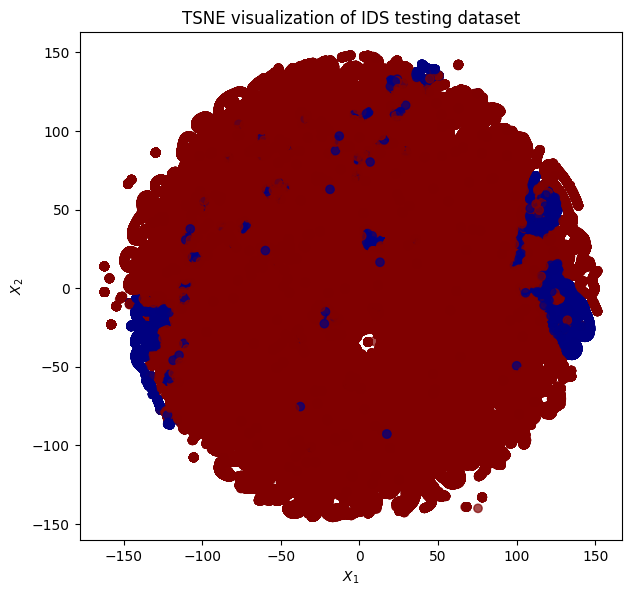

In [2]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

transform = TSNE
X = X_test

trans = transform(n_components=2)
X_reduced = trans.fit_transform(X)

Y = pd.DataFrame(Y_test)
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(
    X_reduced[:, 0], 
    X_reduced[:, 1], 
    c=Y[0].astype('category').cat.codes, 
    cmap='jet',
    alpha=0.7
)

ax.set(
    aspect='equal',
    xlabel='$X_1$',
    ylabel='$X_2$',
    title=f'{transform.__name__} visualization of IDS testing dataset'
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
cv = KFold(n_splits=10, random_state=0, shuffle=True)

accuracy = clf.score(X_test, Y_test)
KFold10_accuracy = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(KFold10_accuracy.mean())

predict = clf.predict(X_test)
cm = confusion_matrix(Y_test, predict)
precision = precision_score(Y_test, predict, average='weighted', labels=np.unique(predict))
recall = recall_score(Y_test, predict, average='weighted', labels=np.unique(predict))
f1scoremacro = f1_score(Y_test, predict, average='macro', labels=np.unique(predict))
print(classification_report(Y_test, predict, target_names=['Normal', 'Attacks']))

In [3]:
cm

array([[ 20334,    339],
       [   412, 544571]])

In [4]:
X_train.info

<bound method DataFrame.info of          totalSourceBytes  totalDestinationBytes  totalDestinationPackets  \
203821               4499                 157598                      108   
422013               2001                  34148                       31   
1737943                77                    280                        2   
1271884               477                   3098                        6   
41578                7939                 160840                      156   
...                   ...                    ...                      ...   
391544                437                   1853                        5   
1341373              3143                  74481                       56   
353661                425                   1595                        4   
1761957               490                   4585                        7   
8835                  529                   1106                       16   

         totalSourcePackets  sourcePort  de

In [5]:
# Calculate false alert rate
false_alert_rate = cm[0][1] / (cm[0][1] + cm[0][0])
print(f"False alert rate: {false_alert_rate}")

False alert rate: 0.016398200551443913


In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

path_test = r"C:\Users\Des\Downloads\ISCXIDS2012 dataset\labeled_flows_xml"

required_columns = ['totalSourceBytes', 'totalDestinationBytes', 'totalDestinationPackets',
                    'totalSourcePackets', 'sourcePort', 'destinationPort', 'Tag']
dataframes = []

for file in os.listdir(path_test):
    file_path = os.path.join(path_test, file)
    df = pd.read_xml(file_path, parser='lxml')

df_test = pd.concat(dataframes, ignore_index=True)

features = ['totalSourceBytes', 'totalDestinationBytes', 'totalDestinationPackets',
            'totalSourcePackets', 'sourcePort', 'destinationPort']
df_test[features] = df_test[features].astype('int64')  

x = df_test[features]
y = df_test['Tag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, class_weight='balanced')
rf.fit(x_train_balanced, y_train_balanced)

cv = KFold(n_splits=10, random_state=42, shuffle=True)
rf_cv_accuracy = cross_val_score(rf, x_train_balanced, y_train_balanced, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"10-Fold CV Accuracy for Random Forest: {rf_cv_accuracy.mean():.4f}")

y_pred = rf.predict(x_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
f1_macro = f1_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))

print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score (Macro): {f1_macro:.4f}")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_alert_rate = fp / (fp + tn)
print(f"False Alert Rate: {false_alert_rate:.4f}")

10-Fold CV Accuracy for Random Forest: 0.9986

Confusion Matrix:
[[ 20571    131]
 [   643 544311]]

Classification Report:
              precision    recall  f1-score   support

      Attack       0.97      0.99      0.98     20702
      Normal       1.00      1.00      1.00    544954

    accuracy                           1.00    565656
   macro avg       0.98      1.00      0.99    565656
weighted avg       1.00      1.00      1.00    565656

Precision: 0.9987, Recall: 0.9986, F1-Score (Macro): 0.9904
False Alert Rate: 0.0063
F1-Score for 'Attack': 0.9815
